# Differential expression exploration
Here we'll read in the DE outputs form Larry's analysis and do some inital exploration of what we have available.

In [19]:
from os import listdir
from os.path import splitext
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

## Read in data

In [6]:
dpath = '../larry_DEG_analyses/results/'
de_data = {}
for f in listdir(dpath):
    if splitext(f)[1] == '.xlsx':
        de_data[splitext(f)[0]] = pd.read_excel(dpath + f)

In [10]:
print(list(de_data.keys()))

['GO_7hr_diff_O2', 'GO_1hr_diff_O2', 'New_data_1.5fold_down', 'New_data_2fold_down', 'New_data_1.5fold_up', 'TPM_values_All_Samples_New_data_Feb03_2023', 'GO_1hr_vs_7hr', 'New_data_2fold_up']


Looks like we've got a lot to work with here! Let's look at one of the `fold_down` and one of the `GO` files to see what's in them.

In [18]:
de_data['GO_7hr_diff_O2'].head()

,GO term,Ontology,Description,Number in input list,Number in BG/Ref,p-value,FDR
0,GO:0009723,P,response to ethylene,10,227,1.500000e-08,0.000008
1,GO:0071369,P,cellular response to ethylene stimulus,8,139,4.800000e-08,0.000013
2,GO:0009873,P,ethylene-activated signaling pathway,7,125,3.800000e-07,0.000069
3,GO:0000160,P,phosphorelay signal transduction system,7,154,1.500000e-06,0.000150
4,GO:0032870,P,cellular response to hormone stimulus,13,658,1.400000e-06,0.000150


In [12]:
de_data['New_data_1.5fold_up'].head()

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,full_name,gene_model_type,short_description,Curator_summary,Computational_description
0,AT3G04840,2229.772790,0.929034,0.114890,2.994455,0.002749,0.025161,NaN,NaN,protein_coding,Ribosomal protein S3Ae,NaN,Ribosomal protein S3Ae;(source:Araport11)
1,AT3G60750,16908.922993,0.933207,0.093420,3.727321,0.000194,0.002390,AtTKL1,NaN,protein_coding,Transketolase,NaN,Transketolase;(source:Araport11)
2,AT3G04920,515.850268,0.937208,0.124674,2.825037,0.004728,0.039840,NaN,NaN,protein_coding,Ribosomal protein S24e family protein,NaN,Ribosomal protein S24e family protein;(source:...
3,AT4G00100,503.446385,0.945289,0.122242,2.947338,0.003205,0.028683,ATRPS13A,ribosomal protein S13A,protein_coding,ribosomal protein S13A,Encodes a cytoplasmic ribosomal protein S13 ho...,ribosomal protein S13A;(source:Araport11)
4,AT1G62390,685.440533,0.956702,0.131541,2.825743,0.004717,0.039784,CLMP1,CLUMPED CHLOROPLASTS 1,protein_coding,Octicosapeptide/Phox/Bem1p (PB1) domain-contai...,Encodes one of the 36 carboxylate clamp (CC)-t...,Octicosapeptide/Phox/Bem1p (PB1) domain-contai...


It's not clear to me how the GO enrichment was done or what the fold change was calculated as -- for example, is this time points or oxygen concentrations being compared? However, it looks like we do have the TPM values, so we can always redo the differential expression parts from scratch:

In [13]:
de_data['TPM_values_All_Samples_New_data_Feb03_2023'].head()

,gene_id,1h_2o2_e,1h_2o2_b,1h_2o2_c,1h_2o2_d,1h_21o2_a,1h_21o2_b,1h_21o2_c,1h_21o2_d,1h_40o2_a,...,7h_2o2_c,7h_2o2_d,7h_21o2_a,7h_21o2_b,7h_21o2_c,7h_21o2_d,7h_40o2_a,7h_40o2_b,7h_40o2_c,7h_40o2_d
0,AT1G01010,0.526533,0.017122,0.170148,0.175678,0.110620,0.389363,0.278284,0.483240,0.070028,...,0.521071,0.311929,0.210737,0.107474,0.522988,0.982047,0.591505,0.401943,0.271770,0.589753
1,AT1G01020,3.944832,3.130740,2.445910,2.805833,3.019138,3.125869,4.402663,3.104490,3.378479,...,4.432259,4.682457,2.879975,3.246371,4.576372,3.641243,4.322213,4.522973,4.297565,4.230665
2,AT1G01030,1.443160,0.717511,0.684348,0.795837,0.925545,0.850774,1.269707,3.970444,2.375630,...,0.940386,1.202753,0.737332,1.096589,0.999126,1.288339,1.587556,1.039973,1.272698,1.410596
3,AT1G01040,1.009103,0.844558,1.165653,1.094549,0.992606,0.906846,1.142293,0.970341,1.268769,...,0.891758,0.961518,0.882134,0.767508,0.919561,0.889087,1.028282,0.959793,1.022762,0.751271
4,AT1G01046,0.000000,1.077077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's make a PCA of TPM and see how it looks:

In [33]:
X = de_data['TPM_values_All_Samples_New_data_Feb03_2023'].drop('gene_id', axis=1).T.to_numpy()
y = np.array(['_'.join(i.split('_')[:2]) for i in de_data['TPM_values_All_Samples_New_data_Feb03_2023'].drop('gene_id', axis=1).columns.tolist()])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [34]:
X.shape

(24, 33195)

In [41]:
y

array(['1h_2o2', '1h_2o2', '1h_2o2', '1h_2o2', '1h_21o2', '1h_21o2',
       '1h_21o2', '1h_21o2', '1h_40o2', '1h_40o2', '1h_40o2', '1h_40o2',
       '7h_2o2', '7h_2o2', '7h_2o2', '7h_2o2', '7h_21o2', '7h_21o2',
       '7h_21o2', '7h_21o2', '7h_40o2', '7h_40o2', '7h_40o2', '7h_40o2'],
      dtype='<U7')

In [42]:
colors

{'1h_2o2': array([0.89019608, 0.46666667, 0.76078431, 1.        ]),
 '1h_21o2': array([0.61960784, 0.85490196, 0.89803922, 1.        ])}

{'7h_2o2': array([0.12156863, 0.46666667, 0.70588235, 1.        ]), '7h_21o2': array([0.17254902, 0.62745098, 0.17254902, 1.        ]), '1h_40o2': array([0.58039216, 0.40392157, 0.74117647, 1.        ]), '7h_40o2': array([0.89019608, 0.46666667, 0.76078431, 1.        ]), '1h_2o2': array([0.7372549 , 0.74117647, 0.13333333, 1.        ]), '1h_21o2': array([0.61960784, 0.85490196, 0.89803922, 1.        ])}


<Figure size 640x480 with 0 Axes>

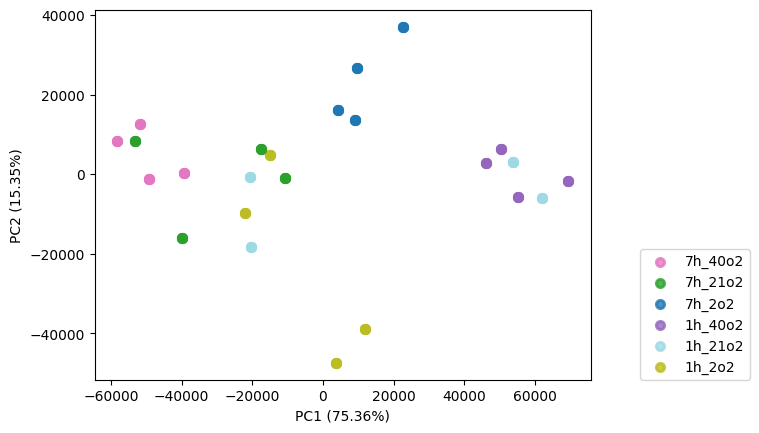

In [47]:
plt.figure()
colors = {i: c for i, c in zip(set(y), plt.cm.tab20(np.linspace(0, 1, len(set(y)))))}
print(colors)
pc1_ex_var, pc2_ex_var = pca.explained_variance_ratio_
lw = 2

fig, ax = plt.subplots(1)
for i in y:
    ax.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=colors[i], alpha=0.8, lw=lw, label=i
    )
ax.set_xlabel(f'PC1 ({pc1_ex_var*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pc2_ex_var*100:.2f}%)')

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles[::-1], labels[::-1])) if l not in labels[::-1][:i]]
    ax.legend(*zip(*unique), loc=(1.1,0))
legend_without_duplicate_labels(ax)